In [ ]:
pip install simpy


Student 0 is waiting in queue with length 0

Student 0 waited for 0.00 seconds

Student 1 is waiting in queue with length 0

Student 1 waited for 0.00 seconds

Student 2 is waiting in queue with length 1

Student 3 is waiting in queue with length 1

Student 4 is waiting in queue with length 2

Student 5 is waiting in queue with length 2

Student 6 is waiting due to max queue length reached: 3

Student 7 is waiting due to max queue length reached: 3

Student 8 is waiting due to max queue length reached: 3

Student 9 is waiting due to max queue length reached: 3

Student 1 has been serviced in 290.66 seconds

Student 3 waited for 288.66 seconds

Student 0 has been serviced in 304.39 seconds

Student 2 waited for 302.39 seconds

Student 2 has been serviced in 150.10 seconds

Student 4 waited for 450.49 seconds

Student 3 has been serviced in 221.39 seconds

Student 5 waited for 508.05 seconds



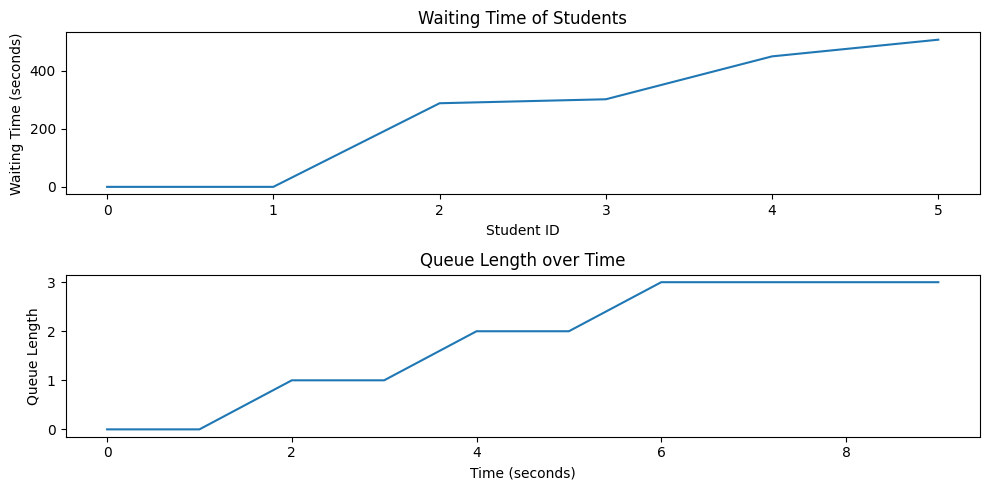

In [ ]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

class CollegeEntrySystem:
    def __init__(self, env, num_students, service_time_mean, service_time_std, num_guard_lines=2, max_queue_length=None):
        self.env = env
        self.num_students = num_students
        self.service_time_mean = service_time_mean
        self.service_time_std = service_time_std
        self.num_guard_lines = num_guard_lines
        self.max_queue_length = max_queue_length
        self.guard_lines = [simpy.Resource(env) for _ in range(num_guard_lines)]
        self.waiting_times = []
        self.queue_lengths = []

    def student_check(self, student_id):
        with self.guard_lines[student_id % self.num_guard_lines].request() as request:
            arrival_time = self.env.now
            queue_length = len(self.guard_lines[student_id % self.num_guard_lines].queue)
            if self.max_queue_length is not None and queue_length >= self.max_queue_length:
                self.queue_lengths.append(self.max_queue_length)
                print(f'Student {student_id} is waiting due to max queue length reached: {self.max_queue_length}\n')
                return
            self.queue_lengths.append(queue_length)
            print(f'Student {student_id} is waiting in queue with length {queue_length}\n')
            yield request
            wait_time = self.env.now - arrival_time
            self.waiting_times.append(wait_time)
            print(f'Student {student_id} waited for {wait_time:.2f} seconds\n')
            service_time = max(0, np.random.normal(self.service_time_mean, self.service_time_std))  # Ensure non-negative service time
            yield self.env.timeout(service_time)
            print(f'Student {student_id} has been serviced in {service_time:.2f} seconds\n')

    def student_generator(self):
        for student_id in range(self.num_students):
            self.env.process(self.student_check(student_id))
            yield self.env.timeout(1)  # Generate a new student every 1 time unit

def run_simulation(num_students, service_time_mean, service_time_std, sim_time, max_queue_length=None):
    env = simpy.Environment()
    college_entry_system = CollegeEntrySystem(env, num_students, service_time_mean, service_time_std, max_queue_length=max_queue_length)
    env.process(college_entry_system.student_generator())
    env.run(until=sim_time)
    return college_entry_system.waiting_times, college_entry_system.queue_lengths

def plot_results(waiting_times, queue_lengths):
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(waiting_times)
    plt.title('Waiting Time of Students')
    plt.xlabel('Student ID')
    plt.ylabel('Waiting Time (seconds)')

    plt.subplot(2, 1, 2)
    plt.plot(queue_lengths)
    plt.title('Queue Length over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Queue Length')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_students = 10
    service_time_mean = 300  # Mean service time in seconds
    service_time_std = 60   # Standard deviation of service time in seconds
    sim_time = 600  # Simulation time in seconds
    max_queue_length = 3  # Maximum queue length

    waiting_times, queue_lengths = run_simulation(num_students, service_time_mean, service_time_std, sim_time, max_queue_length)
    plot_results(waiting_times, queue_lengths)
